# Aufgabe 7
Diese aufgabe wurde hauptsächlich in dem Ordner "training" gelöst, jeglicher Code, der für das Training des ML-Models benutzt, wurde befindet sich in diesem Ordner.
Da wir Weights & Biases benutzt haben, um Metriken der Modele zu tracken und Hyperparameter zu optimieren.
In dieser Datei befinden sich lediglich die Statistiken des Finalen Models

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
import pickle

from training.misc import get_train_data
from sklearn.model_selection import train_test_split
import pandas as pd
import plotly.express as px

train_data = pd.read_csv("./data/atp_matches_till_2022_with_career.csv")
train_data, test_data = train_test_split(train_data, test_size=0.2, random_state=42)

x_train, y_train, x_test, y_test = get_train_data(train_data, test_data)

# Load the already trained model to reduce training time.
gradient_model: GradientBoostingClassifier = pickle.load(open("./data/model_ensemble.pkl", "rb"))

Number of rows after dropping NaNs: 148543
Number of rows before dropping NaNs: 150528
Number of rows dropped: 1985
Number of rows after dropping NaNs: 37147
Number of rows before dropping NaNs: 37633
Number of rows dropped: 486


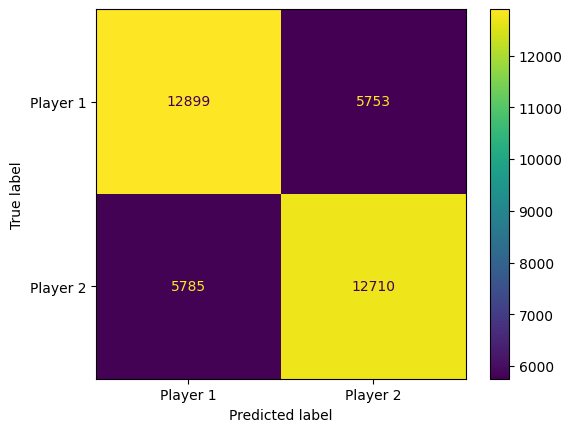

In [66]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Predict labels for the Test Dataset
test_predictions = gradient_model.predict(x_test)

cm = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Player 1", "Player 2"])
disp.plot()
plt.show()

In [67]:
print(accuracy_score(y_test, test_predictions))

0.6893961827334644


Man sieht an dem Accuracy score, das wir zu ~69 % das Ergebnis des Spiels Erfolgreich vorhersagen können.
Doch welche features sind die wichtigsten für die Vorhersage?

In [68]:
feature_importance = pd.DataFrame(gradient_model.feature_importances_)
feature_importance["feature_name"] = gradient_model.feature_names_in_
feature_importance.sort_values(by=0, inplace=True, ascending=True)
feature_importance

,0,feature_name
61,0.000000,One Hot Encode__player_1_ioc_CUW
247,0.000000,One Hot Encode__player_2_ioc_MHL
237,0.000000,One Hot Encode__player_2_ioc_LBA
225,0.000000,One Hot Encode__player_2_ioc_IRQ
48,0.000000,One Hot Encode__player_1_ioc_BUR
...,...,...
322,0.058249,Scale__player_2_loss_rate
316,0.065831,Scale__player_2_seed
315,0.066141,Scale__player_1_seed
320,0.078612,Scale__player_2_win_rate


In [69]:
px.bar(feature_importance, y="feature_name", x=0, orientation="h", height=5000, title="Feature Importance")